# 1. Loading Data

In [7]:
library(caret)

Loading required package: lattice

Loading required package: ggplot2



In [1]:
data <- read.csv("../data/blobs/uPab.0", header = FALSE, sep = ";")
names(data) <- c("p","nmc","nblob","nsa","ncore","ncmt","na","blob","ncopy")
data$copied <- data$ncopy > 0

In [145]:
summary(data)

                                    p                  nmc        
 TheMattSykes_personal-website       :  4022099   Min.   :  0.00  
 AlexxNica_doc.servo.org             :  3802719   1st Qu.:  2.00  
 AdrianDC_aosp_development_sony8960_q:  3113923   Median :  8.00  
 CISecurity_OVALRepo                 :  2638118   Mean   : 36.38  
 odoo_odoo                           :  2181203   3rd Qu.: 38.00  
 3442853561_pistondoc                :  1874252   Max.   :375.00  
 (Other)                             :282784051                   
     nblob              nsa               ncore              ncmt        
 Min.   :      1   Min.   :     0.0   Min.   :   1      Min.   :      1  
 1st Qu.:   1333   1st Qu.:     0.0   1st Qu.:   1      1st Qu.:     25  
 Median :   9906   Median :     0.0   Median :   2      Median :    161  
 Mean   : 313067   Mean   :   744.9   Mean   : 113      Mean   : 152056  
 3rd Qu.:  88700   3rd Qu.:    10.0   3rd Qu.:   3      3rd Qu.:   1892  
 Max.   :5508791   M

In [4]:
data$lnmc <- log(data$nmc + 1)
data$lnblob <- log(data$nblob + 1)
data$lnsa <- log(data$nsa + 1)
data$lncore <- log(data$ncore + 1)
data$lncmt <- log(data$ncmt + 1)
data$lna <- log(data$na + 1)
data$lncopy <- log(data$ncopy + 1)
nas <- which(is.na(data$ncore) | is.na(data$na))
data_c <- data[-nas,c("p","lnmc","lnblob","lnsa","lncore","lncmt","lna","copied","lncopy")]

In [49]:
summary(data_c)

                                    p                  lnmc      
 TheMattSykes_personal-website       :  4022099   Min.   :0.000  
 AdrianDC_aosp_development_sony8960_q:  3113923   1st Qu.:1.099  
 CISecurity_OVALRepo                 :  2638118   Median :2.197  
 odoo_odoo                           :  2181203   Mean   :2.511  
 3442853561_pistondoc                :  1874252   3rd Qu.:3.689  
 funtoo_experimental-mini-2011       :  1823296   Max.   :5.930  
 (Other)                             :279434035                  
     lnblob             lnsa            lncore           lncmt        
 Min.   : 0.6931   Min.   : 0.000   Min.   :0.6931   Min.   : 0.6931  
 1st Qu.: 7.1647   1st Qu.: 0.000   1st Qu.:0.6931   1st Qu.: 3.2581  
 Median : 9.1447   Median : 0.000   Median :1.0986   Median : 5.0499  
 Mean   : 9.2784   Mean   : 1.759   Mean   :1.4404   Mean   : 5.6372  
 3rd Qu.:11.2881   3rd Qu.: 2.485   3rd Qu.:1.3863   3rd Qu.: 7.6094  
 Max.   :15.5219   Max.   :11.616   Max.   :8.

Test data

In [ ]:
data_t <- read.csv("../data/blobs/uPab_test.0", header = FALSE, sep = ";")
names(data_t) <- c("p","nmc","nblob","nsa","ncore","ncmt","na","blob","ncopy")
data_t$copied <- data_t$ncopy > 0
data_t$lnmc <- log(data_t$nmc + 1)
data_t$lnblob <- log(data_t$nblob + 1)
data_t$lnsa <- log(data_t$nsa + 1)
data_t$lncore <- log(data_t$ncore + 1)
data_t$lncmt <- log(data_t$ncmt + 1)
data_t$lna <- log(data_t$na + 1)
data_t$lncopy <- log(data_t$ncopy + 1)
nas_t <- which(is.na(data_t$ncore) | is.na(data_t$na))
data_tc <- data_t[-nas_t,c("p","lnmc","lnblob","lnsa","lncore","lncmt","lna","copied","lncopy")]

# 2. Correlations

In [7]:
pred_n <- c(2:7)

In [56]:
cor(data_c[,pred_n],method="spearman")

,lnmc,lnblob,lnsa,lncore,lncmt,lna
lnmc,1.0000000,0.5242928,0.7121010,0.5699704,0.8897361,0.7450550
lnblob,0.5242928,1.0000000,0.4394352,0.3683275,0.5402930,0.4450408
lnsa,0.7121010,0.4394352,1.0000000,0.5484231,0.6781614,0.6865592
lncore,0.5699704,0.3683275,0.5484231,1.0000000,0.6284436,0.8450870
lncmt,0.8897361,0.5402930,0.6781614,0.6284436,1.0000000,0.7899323
lna,0.7450550,0.4450408,0.6865592,0.8450870,0.7899323,1.0000000


Standard deviations (1, .., p=6):
[1] 2.1458975 0.7925032 0.6408342 0.4900691 0.2929314 0.1744061

Rotation (n x k) = (6 x 6):
             PC1         PC2         PC3         PC4         PC5          PC6
lnmc   0.4127365  0.12655864 -0.64349742  0.10430538 -0.61579558  0.097255970
lnblob 0.3212261  0.85458026  0.39366714 -0.09971444 -0.03878803 -0.009225134
lnsa   0.4149031 -0.22057111 -0.05313086 -0.84656158  0.17225844  0.173324694
lncore 0.4077342 -0.36264552  0.52767243  0.32422920 -0.21532189  0.521837871
lncmt  0.4346419  0.06837165 -0.33055836  0.38642817  0.73274402  0.104414338
lna    0.4462701 -0.26236888  0.20101577  0.08977528 -0.07963040 -0.822920170


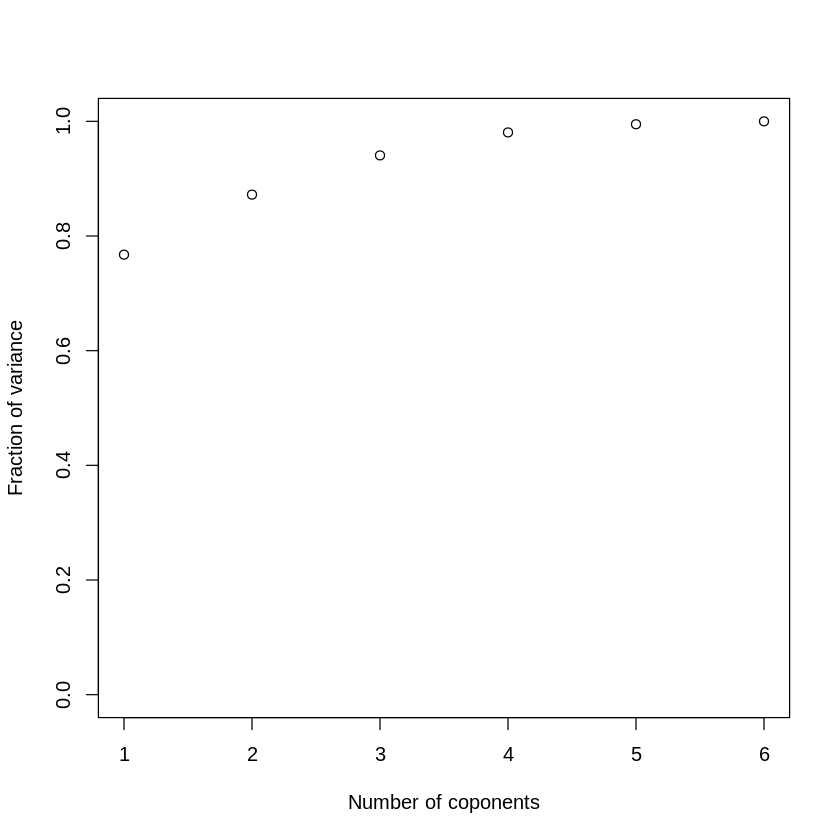

In [99]:
pca <- prcomp(data_c[,pred_n], retx=F, scale=T)
print(pca)
var <- sum(pca$sdev^2)
cumVar <- cumsum(pca$sdev^2)
plot(1:6,cumVar/var,ylim=c(0,1),xlab="Number of coponents",ylab="Fraction of variance")

In [100]:
n <- 0
varPer <- 0.9
for (i in c(1:length(pca$sdev))) {
    if(cumVar[i] > var*varPer) {
        n <- i
        break
    }
}
res <- pca$rotation[,1:n]
resAbs <- res
resAbs[res<0] <- -res[res<0]
for (i in 1:n)
  print(t(res[resAbs[,i]>.3,i,drop=FALSE]));

         lnmc    lnblob      lnsa    lncore     lncmt       lna
PC1 0.4127365 0.3212261 0.4149031 0.4077342 0.4346419 0.4462701
       lnblob     lncore
PC2 0.8545803 -0.3626455
          lnmc    lnblob    lncore      lncmt
PC3 -0.6434974 0.3936671 0.5276724 -0.3305584


In [8]:
vnam <- names(data_c[,pred_n])
len <- dim(data_c[,pred_n])[2]
res <- vector(mode="list", length=len)
for (i in 1:len){
  fmla <- as.formula(paste(vnam[i],paste(vnam[-i],collapse="+"),sep="~"));
  res[[i]] <- lm(fmla,data=data_c[,pred_n]);
}

In [9]:
for (i in 1:len) {
    print(c(vnam[i],"-> ",summary(res[[i]])$adj.r.squared),quote=FALSE)
}

[1] lnmc              ->                0.828950609106906
[1] lnblob            ->                0.384352131731084
[1] lnsa              ->                0.774733504572413
[1] lncore            ->                0.907868966300289
[1] lncmt             ->                0.867581629389782
[1] lna               ->                0.955795503217049


# 3. Model

### 3.1. ~ lnmc + lnblob + lnsa + lncmt

In [117]:
lm <- lm(lncopy~lnmc+lnblob+lnsa+lncmt, data=data_c)
summary(lm)


Call:
lm(formula = lncopy ~ lnmc + lnblob + lnsa + lncmt, data = data_c)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.4148 -0.1434 -0.1011 -0.0655 14.4563 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8.586e-02  1.030e-04   833.9   <2e-16 ***
lnmc        -7.210e-03  4.265e-05  -169.0   <2e-16 ***
lnblob       8.178e-03  1.256e-05   651.0   <2e-16 ***
lnsa         3.471e-02  1.658e-05  2093.5   <2e-16 ***
lncmt       -1.383e-02  2.021e-05  -684.5   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4775 on 295086921 degrees of freedom
Multiple R-squared:  0.02114,	Adjusted R-squared:  0.02114 
F-statistic: 1.593e+06 on 4 and 295086921 DF,  p-value: < 2.2e-16


In [ ]:
plot(residuals(lm, type="deviance"))

In [36]:
glm <- glm(copied~lnmc+lnblob+lnsa+lncmt,data=data_c,family=binomial)
summary(glm)


Call:
glm(formula = copied ~ lnmc + lnblob + lnsa + lncmt, family = binomial, 
    data = data_c)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.8897  -0.4952  -0.4290  -0.3752   2.8120  

Coefficients:
              Estimate Std. Error  z value Pr(>|z|)    
(Intercept) -2.414e+00  7.324e-04 -3296.24   <2e-16 ***
lnmc         1.625e-02  3.091e-04    52.58   <2e-16 ***
lnblob       7.085e-02  8.679e-05   816.40   <2e-16 ***
lnsa         2.000e-01  1.112e-04  1797.68   <2e-16 ***
lncmt       -1.524e-01  1.449e-04 -1052.17   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 196275349  on 295086925  degrees of freedom
Residual deviance: 191665246  on 295086921  degrees of freedom
AIC: 191665256

Number of Fisher Scoring iterations: 5


In [37]:
glm_p <- predict(glm,newdata=data_tc,type="response") > 0.5
confusionMatrix(data=factor(glm_p), reference = factor(data_tc[,"copied"]))

Warning message in confusionMatrix.default(data = factor(glm_p), reference = factor(data_tc[, :
"Levels are not in the same order for reference and data. Refactoring data to match."


Confusion Matrix and Statistics

          Reference
Prediction    FALSE     TRUE
     FALSE 18224593  1625415
     TRUE         0        0
                                         
               Accuracy : 0.9181         
                 95% CI : (0.918, 0.9182)
    No Information Rate : 0.9181         
    P-Value [Acc > NIR] : 0.5002         
                                         
                  Kappa : 0              
                                         
 Mcnemar's Test P-Value : <2e-16         
                                         
            Sensitivity : 1.0000         
            Specificity : 0.0000         
         Pos Pred Value : 0.9181         
         Neg Pred Value :    NaN         
             Prevalence : 0.9181         
         Detection Rate : 0.9181         
   Detection Prevalence : 1.0000         
      Balanced Accuracy : 0.5000         
                                         
       'Positive' Class : FALSE          
                    

### 3.2. ~ lnsa

In [8]:
lm2 <- lm(lncopy~lnsa, data=data_c)
summary(lm2)


Call:
lm(formula = lncopy ~ lnsa, data = data_c)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.3557 -0.1310 -0.0858 -0.0858 14.4448 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 8.584e-02  3.331e-05    2577   <2e-16 ***
lnsa        2.324e-02  1.038e-05    2238   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4786 on 295086924 degrees of freedom
Multiple R-squared:  0.01669,	Adjusted R-squared:  0.01669 
F-statistic: 5.008e+06 on 1 and 295086924 DF,  p-value: < 2.2e-16


In [9]:
glm2 <- glm(copied~lnsa,data=data_c,family=binomial)
summary(glm2)


Call:
glm(formula = copied ~ lnsa, family = binomial, data = data_c)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.7272  -0.4646  -0.4231  -0.4231   2.2172  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.368e+00  2.426e-04   -9764   <2e-16 ***
lnsa         1.010e-01  6.192e-05    1631   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 196275349  on 295086925  degrees of freedom
Residual deviance: 193818462  on 295086924  degrees of freedom
AIC: 193818466

Number of Fisher Scoring iterations: 5


In [34]:
glm2_p <- predict(glm2,newdata=data_tc,type="response") > 0.5
confusionMatrix(data=factor(glm2_p), reference = factor(data_tc[,"copied"]))

Warning message in confusionMatrix.default(data = factor(glm2_p), reference = factor(data_tc[, :
"Levels are not in the same order for reference and data. Refactoring data to match."


Confusion Matrix and Statistics

          Reference
Prediction    FALSE     TRUE
     FALSE 18224593  1625415
     TRUE         0        0
                                         
               Accuracy : 0.9181         
                 95% CI : (0.918, 0.9182)
    No Information Rate : 0.9181         
    P-Value [Acc > NIR] : 0.5002         
                                         
                  Kappa : 0              
                                         
 Mcnemar's Test P-Value : <2e-16         
                                         
            Sensitivity : 1.0000         
            Specificity : 0.0000         
         Pos Pred Value : 0.9181         
         Neg Pred Value :    NaN         
             Prevalence : 0.9181         
         Detection Rate : 0.9181         
   Detection Prevalence : 1.0000         
      Balanced Accuracy : 0.5000         
                                         
       'Positive' Class : FALSE          
                    

### 3.3. ~ lnmc + lnblob + lnsa + lncmt + cext

In [1]:
data <- read.csv("../data/blobs/blobs.0", header = FALSE, sep = ";", comment.char="", quote="", fill = TRUE,
                 col.names = c("blob","p","nmc","nblob","nsa","ncore","ncmt","na","ncopy","ext","null"))
data$copied <- data$ncopy > 0

In [4]:
summary(data)

                                       blob          
 000046a34e09d434cd7b155d2d7edeec67e33343:        2  
 0000859499ce00d7ce45fed541c73400e21b2b18:        2  
 0000f17d6a3b9fba1ad146924e1499016f207b28:        2  
 0000fa01b7b23e5317cf2e79fa3765280d75ba9d:        2  
 000225b41a38cafdc84e16108631675bb8c78b3b:        2  
 0002b6ae2e76bc70543326c604c29857d90a75a6:        2  
 (Other)                                 :146058545  
                                    p                  nmc        
 AlexxNica_doc.servo.org             :  1912352   Min.   :  0.00  
 TheMattSykes_personal-website       :  1793642   1st Qu.:  3.00  
 AdrianDC_aosp_development_sony8960_q:  1687091   Median :  8.00  
 CISecurity_OVALRepo                 :  1326881   Mean   : 38.14  
 odoo_odoo                           :  1096477   3rd Qu.: 42.00  
 3442853561_pistondoc                :   942718   Max.   :375.00  
 (Other)                             :137299396                   
     nblob              nsa     

In [ ]:
#log transform
data$lnmc <- log(data$nmc + 1)
data$lnblob <- log(data$nblob + 1)
data$lnsa <- log(data$nsa + 1)
data$lncore <- log(data$ncore + 1)
data$lncmt <- log(data$ncmt + 1)
data$lna <- log(data$na + 1)
data$lncopy <- log(data$ncopy + 1)

#cleaning extensions
lower_ext <- tolower(gsub("[^[:alnum:]]","",data$ext))
ext_levels <- sort(table(lower_ext),decreasing=TRUE)
data$cext <- as.factor(ifelse(((lower_ext %in% names(ext_levels[1:50])) & (lower_ext != "")), 
                    lower_ext, "other"))

#dealing with missing data
nas <- which(is.na(data$ncore) | is.na(data$na) )

#aggregating
data_c <- data[-nas,c("lnmc","lnblob","lnsa","lncore","lncmt","lna","copied","lncopy","cext")]

In [99]:
summary(data_c)

      lnmc           lnblob             lnsa            lncore      
 Min.   :0.000   Min.   : 0.6931   Min.   : 0.000   Min.   :0.6931  
 1st Qu.:1.386   1st Qu.: 7.0959   1st Qu.: 0.000   1st Qu.:0.6931  
 Median :2.303   Median : 9.0811   Median : 0.000   Median :1.0986  
 Mean   :2.572   Mean   : 9.2653   Mean   : 1.822   Mean   :1.4602  
 3rd Qu.:3.784   3rd Qu.:11.3896   3rd Qu.: 2.639   3rd Qu.:1.3863  
 Max.   :5.930   Max.   :15.5219   Max.   :11.616   Max.   :8.7147  
                                                                    
     lncmt              lna            copied              lncopy       
 Min.   : 0.6931   Min.   : 0.6931   Mode :logical     Min.   : 0.0000  
 1st Qu.: 3.4012   1st Qu.: 0.6931   FALSE:127184352   1st Qu.: 0.0000  
 Median : 5.1591   Median : 1.3863   TRUE :16227065    Median : 0.0000  
 Mean   : 5.7533   Mean   : 2.2666                     Mean   : 0.1392  
 3rd Qu.: 7.7467   3rd Qu.: 2.8332                     3rd Qu.: 0.0000  
 Max.   :1

In [3]:
ext_levels <- sort(table(data$cext),decreasing=TRUE)

In [5]:
ext_levels[0:50]


      html       java                    js        png        xml       json 
  15625233   10509410    8784799    7513273    6973192    6441124    5724187 
       jpg        php         md        txt         py        pyc         cs 
   4833489    4387845    4343098    4046411    3934828    3872922    3064631 
         h        cpp          c         ts      class         rb       meta 
   2252094    2230496    1956677    1732826    1726899    1708490    1520087 
       css        csv         po    geojson        yml         go       scss 
   1367531    1199593    1139373     964700     935185     739697     704064 
      info        erb          m      cache        map        vue        svg 
    614131     546940     525824     511776     489578     485430     477051 
         o        pdf       flat      swift        hpp         sh        bin 
    472134     471588     464260     437543     427278     423602     421312 
    csproj       lock properties         kt        jsx      sca

In [100]:
lm <- lm(lncopy~lnmc+lnblob+lnsa+lncmt+cext, data=data_c)
summary(lm)


Call:
lm(formula = lncopy ~ lnmc + lnblob + lnsa + lncmt + cext, data = data_c)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.7693 -0.1793 -0.1076 -0.0356 14.3830 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     4.361e-01  7.838e-04   556.4   <2e-16 ***
lnmc            1.197e-02  6.442e-05   185.8   <2e-16 ***
lnblob          6.995e-03  2.091e-05   334.5   <2e-16 ***
lnsa            2.804e-02  2.442e-05  1148.4   <2e-16 ***
lncmt          -1.215e-02  3.104e-05  -391.5   <2e-16 ***
cextc          -2.921e-01  8.445e-04  -345.9   <2e-16 ***
cextcache      -4.245e-01  1.030e-03  -412.0   <2e-16 ***
cextcc         -3.061e-01  1.147e-03  -266.9   <2e-16 ***
cextclass      -3.006e-01  8.521e-04  -352.8   <2e-16 ***
cextcpp        -3.687e-01  8.368e-04  -440.6   <2e-16 ***
cextcs         -4.284e-01  8.168e-04  -524.5   <2e-16 ***
cextcsproj     -4.806e-01  1.090e-03  -440.8   <2e-16 ***
cextcss        -3.756e-01  8.762e-04  -428.7   <2e-16 **

In [4]:
glm <- glm(copied~lnmc+lnblob+lnsa+lncmt+cext, data=data_c, family=binomial)
summary(glm)


Call:
glm(formula = copied ~ lnmc + lnblob + lnsa + lncmt + cext, family = binomial, 
    data = data_c)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.2699  -0.5434  -0.4279  -0.3150   4.0740  

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)    -1.4689022  0.0036700  -400.2   <2e-16 ***
lnmc            0.1989849  0.0004317   460.9   <2e-16 ***
lnblob          0.0651555  0.0001361   478.6   <2e-16 ***
lnsa            0.1353542  0.0001527   886.4   <2e-16 ***
lncmt          -0.1463838  0.0002095  -698.9   <2e-16 ***
cextc          -0.7657900  0.0039904  -191.9   <2e-16 ***
cextcache      -1.7964818  0.0072539  -247.7   <2e-16 ***
cextcc         -0.6609089  0.0055320  -119.5   <2e-16 ***
cextclass      -0.6980222  0.0041080  -169.9   <2e-16 ***
cextcpp        -0.9219593  0.0039875  -231.2   <2e-16 ***
cextcs         -1.6241690  0.0041743  -389.1   <2e-16 ***
cextcsproj     -2.4151190  0.0093974  -257.0   <2e-16 ***
cextcss    

In [ ]:
data_t <- read.csv("../data/blobs/blobs_test.0", header = FALSE, sep = ";", comment.char="", quote="", fill = TRUE,
                 col.names = c("blob","p","nmc","nblob","nsa","ncore","ncmt","na","ncopy","ext","null"))
data_t$copied <- data_t$ncopy > 0
data_t$lnmc <- log(data_t$nmc + 1)
data_t$lnblob <- log(data_t$nblob + 1)
data_t$lnsa <- log(data_t$nsa + 1)
data_t$lncore <- log(data_t$ncore + 1)
data_t$lncmt <- log(data_t$ncmt + 1)
data_t$lna <- log(data_t$na + 1)
data_t$lncopy <- log(data_t$ncopy + 1)
lower_ext_t <- tolower(gsub("[^[:alnum:]]","",data_t$ext))
data_t$cext <- as.factor(ifelse(((lower_ext_t %in% names(ext_levels[1:50])) & (lower_ext_t != "")), 
                    lower_ext_t, "other"))
nas_t <- which(is.na(data_t$ncore) | is.na(data_t$na))
data_tc <- data_t[-nas_t,c("lnmc","lnblob","lnsa","lncore","lncmt","lna","copied","lncopy","cext")]

In [8]:
library(caret)
glm_p <- predict(glm,newdata=data_tc,type="response") > 0.5
confusionMatrix(data=factor(glm_p), reference = factor(data_tc[,"copied"]))

Confusion Matrix and Statistics

          Reference
Prediction    FALSE     TRUE
     FALSE 18104229  1745172
     TRUE         7        9
                                         
               Accuracy : 0.9121         
                 95% CI : (0.912, 0.9122)
    No Information Rate : 0.9121         
    P-Value [Acc > NIR] : 0.4996         
                                         
                  Kappa : 0              
                                         
 Mcnemar's Test P-Value : <2e-16         
                                         
            Sensitivity : 1.000e+00      
            Specificity : 5.157e-06      
         Pos Pred Value : 9.121e-01      
         Neg Pred Value : 5.625e-01      
             Prevalence : 9.121e-01      
         Detection Rate : 9.121e-01      
   Detection Prevalence : 1.000e+00      
      Balanced Accuracy : 5.000e-01      
                                         
       'Positive' Class : FALSE          
                    

### 3.4. ~ c language

In [1]:
data <- read.csv("../data/blobs/blobs.0", header = FALSE, sep = ";", comment.char="", quote="", fill = TRUE,
                 col.names = c("blob","p","nmc","nblob","nsa","ncore","ncmt","na","ncopy","ext","null"))
data$copied <- data$ncopy > 0
data$lnmc <- log(data$nmc + 1)
data$lnblob <- log(data$nblob + 1)
data$lnsa <- log(data$nsa + 1)
data$lncore <- log(data$ncore + 1)
data$lncmt <- log(data$ncmt + 1)
data$lna <- log(data$na + 1)
data$lncopy <- log(data$ncopy + 1)
data$cext <- as.factor(tolower(gsub("[^[:alnum:]]","",data$ext)))

In [24]:
c_idx <- which(lower_ext == "c" | lower_ext == "cpp" | lower_ext == "cxx" | lower_ext == "h" |
                      lower_ext == "hpp" | lower_ext == "hxx" | lower_ext == "cs")
data_c <- data[c_idx,]
nas <- which(is.na(data_c$ncore) | is.na(data_c$na))
data_c <- data_c[-nas,c("lnmc","lnblob","lnsa","lncore","lncmt","lna","copied","lncopy","cext")]

In [41]:
summary(data_c)

      lnmc           lnblob             lnsa            lncore      
 Min.   :0.000   Min.   : 0.6931   Min.   : 0.000   Min.   :0.6931  
 1st Qu.:1.792   1st Qu.: 7.1131   1st Qu.: 0.000   1st Qu.:0.6931  
 Median :3.091   Median : 9.0083   Median : 1.099   Median :1.0986  
 Mean   :3.153   Mean   : 9.1366   Mean   : 2.479   Mean   :1.6171  
 3rd Qu.:4.635   3rd Qu.:11.0246   3rd Qu.: 4.654   3rd Qu.:1.7918  
 Max.   :5.930   Max.   :15.5219   Max.   :11.616   Max.   :8.7147  
                                                                    
     lncmt              lna            copied            lncopy      
 Min.   : 0.6931   Min.   : 0.6931   Mode :logical   Min.   :0.0000  
 1st Qu.: 4.3307   1st Qu.: 1.0986   FALSE:8558170   1st Qu.:0.0000  
 Median : 6.2226   Median : 1.7918   TRUE :1454584   Median :0.0000  
 Mean   : 6.6741   Mean   : 2.7284                   Mean   :0.1765  
 3rd Qu.: 8.9092   3rd Qu.: 3.9120                   3rd Qu.:0.0000  
 Max.   :15.7374   Max.   :1

In [45]:
lm <- lm(lncopy~lnmc+lnblob+lnsa+lncmt+cext, data=data_c)
summary(lm)


Call:
lm(formula = lncopy ~ lnmc + lnblob + lnsa + lncmt + cext, data = data_c)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.6751 -0.2302 -0.1263 -0.0221  9.3158 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5.957e-02  8.289e-04  -71.86   <2e-16 ***
lnmc        -2.204e-02  2.518e-04  -87.53   <2e-16 ***
lnblob       1.279e-02  9.942e-05  128.65   <2e-16 ***
lnsa         3.806e-03  8.823e-05   43.13   <2e-16 ***
lncmt        3.222e-02  1.363e-04  236.46   <2e-16 ***
cextcpp     -6.444e-02  5.156e-04 -124.97   <2e-16 ***
cextcs      -9.370e-02  5.024e-04 -186.50   <2e-16 ***
cextcxx      1.199e-01  1.829e-03   65.55   <2e-16 ***
cexth        4.442e-02  5.111e-04   86.91   <2e-16 ***
cexthpp     -9.087e-02  8.672e-04 -104.78   <2e-16 ***
cexthxx      5.845e-02  4.376e-03   13.36   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5103 on 10012743 degrees of freedom
Multiple R-squared:

In [46]:
glm <- glm(copied~lnmc+lnblob+lnsa+lncmt+cext, data=data_c, family=binomial)
summary(glm)


Call:
glm(formula = copied ~ lnmc + lnblob + lnsa + lncmt + cext, family = binomial, 
    data = data_c)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.2823  -0.6019  -0.4608  -0.3319   2.7388  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.2539779  0.0050868 -639.69   <2e-16 ***
lnmc         0.0939821  0.0014132   66.50   <2e-16 ***
lnblob       0.0714856  0.0005933  120.49   <2e-16 ***
lnsa        -0.0184384  0.0004693  -39.29   <2e-16 ***
lncmt        0.0817504  0.0007732  105.73   <2e-16 ***
cextcpp     -0.0947109  0.0027848  -34.01   <2e-16 ***
cextcs      -0.6110728  0.0031851 -191.85   <2e-16 ***
cextcxx      0.7343313  0.0077247   95.06   <2e-16 ***
cexth        0.3109672  0.0026442  117.60   <2e-16 ***
cexthpp     -0.2099330  0.0048502  -43.28   <2e-16 ***
cexthxx      0.5871995  0.0188959   31.08   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial fa

### 3.5. ~ java language

In [47]:
java_idx <- which(lower_ext == "class" | lower_ext == "dpj" | lower_ext == "java" | lower_ext == "jar")
data_c <- data[java_idx,]
nas <- which(is.na(data_c$ncore) | is.na(data_c$na))
data_c <- data_c[-nas,c("lnmc","lnblob","lnsa","lncore","lncmt","lna","copied","lncopy","cext")]

In [48]:
summary(data_c)

      lnmc            lnblob             lnsa             lncore      
 Min.   :0.6931   Min.   : 0.6931   Min.   : 0.0000   Min.   :0.6931  
 1st Qu.:1.3863   1st Qu.: 6.6542   1st Qu.: 0.0000   1st Qu.:0.6931  
 Median :2.4849   Median : 8.3462   Median : 0.6931   Median :1.0986  
 Mean   :2.7957   Mean   : 8.7970   Mean   : 2.1295   Mean   :1.8255  
 3rd Qu.:4.3438   3rd Qu.:10.6810   3rd Qu.: 3.5835   3rd Qu.:2.0794  
 Max.   :5.9296   Max.   :15.5219   Max.   :11.6156   Max.   :8.7147  
                                                                      
     lncmt              lna            copied             lncopy     
 Min.   : 0.6931   Min.   : 0.6931   Mode :logical    Min.   :0.000  
 1st Qu.: 3.4657   1st Qu.: 1.0986   FALSE:10881592   1st Qu.:0.000  
 Median : 5.5413   Median : 1.6094   TRUE :1493138    Median :0.000  
 Mean   : 6.3251   Mean   : 2.7898                    Mean   :0.136  
 3rd Qu.: 8.6601   3rd Qu.: 3.8067                    3rd Qu.:0.000  
 Max.   :15.

In [49]:
lm <- lm(lncopy~lnmc+lnblob+lnsa+lncmt+cext, data=data_c)
summary(lm)


Call:
lm(formula = lncopy ~ lnmc + lnblob + lnsa + lncmt + cext, data = data_c)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.4168 -0.1779 -0.1027 -0.0370  8.9046 

Coefficients:
              Estimate Std. Error  t value Pr(>|t|)    
(Intercept) -1.647e-02  6.309e-04  -26.099   <2e-16 ***
lnmc         1.381e-02  1.942e-04   71.112   <2e-16 ***
lnblob       2.558e-02  9.009e-05  283.979   <2e-16 ***
lnsa         8.389e-03  7.047e-05  119.045   <2e-16 ***
lncmt       -7.600e-03  9.549e-05  -79.596   <2e-16 ***
cextdpj     -1.955e-01  1.326e-01   -1.474     0.14    
cextjar     -3.931e-02  1.072e-03  -36.669   <2e-16 ***
cextjava    -9.500e-02  3.954e-04 -240.282   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4399 on 12374722 degrees of freedom
Multiple R-squared:  0.03888,	Adjusted R-squared:  0.03888 
F-statistic: 7.152e+04 on 7 and 12374722 DF,  p-value: < 2.2e-16


### 3.6. ~ python language

In [50]:
py_idx <- which(lower_ext == "py" | lower_ext == "py3" | lower_ext == "pyc" | lower_ext == "pyo" 
                | lower_ext == "pyw")
data_c <- data[py_idx,]
nas <- which(is.na(data_c$ncore) | is.na(data_c$na))
data_c <- data_c[-nas,c("lnmc","lnblob","lnsa","lncore","lncmt","lna","copied","lncopy","cext")]
summary(data_c)

      lnmc            lnblob             lnsa            lncore      
 Min.   :0.6931   Min.   : 0.6931   Min.   : 0.000   Min.   :0.6931  
 1st Qu.:1.0986   1st Qu.: 7.2752   1st Qu.: 0.000   1st Qu.:0.6931  
 Median :1.6094   Median : 8.6597   Median : 0.000   Median :0.6931  
 Mean   :2.2243   Mean   : 8.5710   Mean   : 1.677   Mean   :1.4070  
 3rd Qu.:3.3673   3rd Qu.: 9.5868   3rd Qu.: 2.197   3rd Qu.:1.3863  
 Max.   :5.9296   Max.   :15.5219   Max.   :11.616   Max.   :8.7147  
                                                                     
     lncmt              lna            copied            lncopy       
 Min.   : 0.6931   Min.   : 0.6931   Mode :logical   Min.   :0.00000  
 1st Qu.: 2.4849   1st Qu.: 0.6931   FALSE:7323972   1st Qu.:0.00000  
 Median : 4.1897   Median : 1.0986   TRUE :468271    Median :0.00000  
 Mean   : 5.0492   Mean   : 2.1214                   Mean   :0.06728  
 3rd Qu.: 6.8079   3rd Qu.: 2.4849                   3rd Qu.:0.00000  
 Max.   :15.73

In [51]:
lm <- lm(lncopy~lnmc+lnblob+lnsa+lncmt+cext, data=data_c)
summary(lm)


Call:
lm(formula = lncopy ~ lnmc + lnblob + lnsa + lncmt + cext, data = data_c)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.4364 -0.0743 -0.0442 -0.0262  9.2429 

Coefficients:
              Estimate Std. Error  t value Pr(>|t|)    
(Intercept)  5.110e-02  5.603e-04   91.203   <2e-16 ***
lnmc         6.409e-03  2.213e-04   28.967   <2e-16 ***
lnblob       6.338e-03  9.690e-05   65.405   <2e-16 ***
lnsa         2.397e-02  8.221e-05  291.557   <2e-16 ***
lncmt       -1.391e-02  1.122e-04 -123.973   <2e-16 ***
cextpy3      2.912e-01  3.406e-02    8.549   <2e-16 ***
cextpyc     -4.535e-02  4.419e-04 -102.633   <2e-16 ***
cextpyo      3.768e-02  3.361e-03   11.210   <2e-16 ***
cextpyw     -3.085e-02  1.215e-02   -2.538   0.0111 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3372 on 7792234 degrees of freedom
Multiple R-squared:  0.02958,	Adjusted R-squared:  0.02958 
F-statistic: 2.969e+04 on 8 and 7792234 DF,  p-value: < 2.2e

### 3.7. ~ go language

In [52]:
go_idx <- which(lower_ext == "go")
data_c <- data[go_idx,]
nas <- which(is.na(data_c$ncore) | is.na(data_c$na))
data_c <- data_c[-nas,c("lnmc","lnblob","lnsa","lncore","lncmt","lna","copied","lncopy","cext")]
summary(data_c)

      lnmc            lnblob             lnsa            lncore      
 Min.   :0.6931   Min.   : 0.6931   Min.   : 0.000   Min.   :0.6931  
 1st Qu.:2.3026   1st Qu.: 6.7178   1st Qu.: 1.099   1st Qu.:0.6931  
 Median :3.3673   Median : 8.6149   Median : 3.871   Median :1.3863  
 Mean   :3.1468   Mean   : 8.7216   Mean   : 3.856   Mean   :1.8517  
 3rd Qu.:4.0254   3rd Qu.:11.0252   3rd Qu.: 6.215   3rd Qu.:2.1972  
 Max.   :5.9296   Max.   :15.5219   Max.   :11.616   Max.   :8.7147  
                                                                     
     lncmt              lna            copied            lncopy     
 Min.   : 0.6931   Min.   : 0.6931   Mode :logical   Min.   :0.000  
 1st Qu.: 5.0239   1st Qu.: 1.3863   FALSE:651542    1st Qu.:0.000  
 Median : 6.8628   Median : 2.8904   TRUE :87667     Median :0.000  
 Mean   : 7.1862   Mean   : 3.2364                   Mean   :0.164  
 3rd Qu.: 9.7294   3rd Qu.: 4.4188                   3rd Qu.:0.000  
 Max.   :15.7374   Max.   

In [53]:
lm <- lm(lncopy~lnmc+lnblob+lnsa+lncmt, data=data_c)
summary(lm)


Call:
lm(formula = lncopy ~ lnmc + lnblob + lnsa + lncmt, data = data_c)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.4715 -0.2523 -0.1343 -0.0007  8.3210 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.1842424  0.0025962  -70.97   <2e-16 ***
lnmc         0.0484330  0.0012172   39.79   <2e-16 ***
lnblob       0.0492309  0.0006658   73.94   <2e-16 ***
lnsa         0.0278703  0.0003800   73.34   <2e-16 ***
lncmt       -0.0474534  0.0007009  -67.70   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5393 on 739204 degrees of freedom
Multiple R-squared:  0.05565,	Adjusted R-squared:  0.05564 
F-statistic: 1.089e+04 on 4 and 739204 DF,  p-value: < 2.2e-16


In [2]:
data <- read.csv("../data/blobs/blobs.0", header = FALSE, sep = ";", comment.char="", quote="", fill = TRUE,
                 col.names = c("blob","p","nmc","nblob","nsa","ncore","ncmt","na","ncopy","ext","lan","pac"))
data$copied <- data$ncopy > 0
data$imp <- data$pac != ""
summary(data)

                                       blob          
 000046a34e09d434cd7b155d2d7edeec67e33343:        2  
 0000859499ce00d7ce45fed541c73400e21b2b18:        2  
 0000f17d6a3b9fba1ad146924e1499016f207b28:        2  
 0000fa01b7b23e5317cf2e79fa3765280d75ba9d:        2  
 000225b41a38cafdc84e16108631675bb8c78b3b:        2  
 0002b6ae2e76bc70543326c604c29857d90a75a6:        2  
 (Other)                                 :146058545  
                                    p                  nmc        
 AlexxNica_doc.servo.org             :  1912352   Min.   :  0.00  
 TheMattSykes_personal-website       :  1793642   1st Qu.:  3.00  
 AdrianDC_aosp_development_sony8960_q:  1687091   Median :  8.00  
 CISecurity_OVALRepo                 :  1326881   Mean   : 38.14  
 odoo_odoo                           :  1096477   3rd Qu.: 42.00  
 3442853561_pistondoc                :   942718   Max.   :375.00  
 (Other)                             :137299396                   
     nblob              nsa     

In [3]:
lower_ext <- tolower(gsub("[^[:alnum:]]","",data$ext))
ext_levels <- sort(table(lower_ext),decreasing=TRUE)
data$cext <- as.factor(ifelse(((lower_ext %in% names(ext_levels[1:50])) & (lower_ext != "")), 
                    lower_ext, "other"))

In [5]:
data$lnmc <- log(data$nmc + 1)
data$lnblob <- log(data$nblob + 1)
data$lnsa <- log(data$nsa + 1)
data$lncore <- log(data$ncore + 1)
data$lncmt <- log(data$ncmt + 1)
data$lna <- log(data$na + 1)
data$lncopy <- log(data$ncopy + 1)
c_idx <- which(lower_ext == "c" | lower_ext == "cpp" | lower_ext == "cxx" | lower_ext == "h" |
                      lower_ext == "hpp" | lower_ext == "hxx" | lower_ext == "cs")
data_c <- data[c_idx,]
nas <- which(is.na(data_c$ncore) | is.na(data_c$na))
data_c <- data_c[-nas,c("lnmc","lnblob","lnsa","lncore","lncmt","lna","copied","lncopy","cext","imp")]

In [6]:
summary(data_c)

      lnmc           lnblob             lnsa            lncore      
 Min.   :0.000   Min.   : 0.6931   Min.   : 0.000   Min.   :0.6931  
 1st Qu.:1.792   1st Qu.: 7.1131   1st Qu.: 0.000   1st Qu.:0.6931  
 Median :3.091   Median : 9.0083   Median : 1.099   Median :1.0986  
 Mean   :3.153   Mean   : 9.1366   Mean   : 2.479   Mean   :1.6171  
 3rd Qu.:4.635   3rd Qu.:11.0246   3rd Qu.: 4.654   3rd Qu.:1.7918  
 Max.   :5.930   Max.   :15.5219   Max.   :11.616   Max.   :8.7147  
                                                                    
     lncmt              lna            copied            lncopy      
 Min.   : 0.6931   Min.   : 0.6931   Mode :logical   Min.   :0.0000  
 1st Qu.: 4.3307   1st Qu.: 1.0986   FALSE:8558173   1st Qu.:0.0000  
 Median : 6.2226   Median : 1.7918   TRUE :1454584   Median :0.0000  
 Mean   : 6.6741   Mean   : 2.7284                   Mean   :0.1765  
 3rd Qu.: 8.9092   3rd Qu.: 3.9120                   3rd Qu.:0.0000  
 Max.   :15.7374   Max.   :1

In [9]:
lm <- lm(lncopy~lnmc+lnblob+lnsa+lncmt+cext+imp, data=data_c)
summary(lm)


Call:
lm(formula = lncopy ~ lnmc + lnblob + lnsa + lncmt + cext + imp, 
    data = data_c)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.6663 -0.2303 -0.1264 -0.0221  9.3158 

Coefficients:
              Estimate Std. Error  t value Pr(>|t|)    
(Intercept) -5.951e-02  8.289e-04  -71.792  < 2e-16 ***
lnmc        -2.206e-02  2.518e-04  -87.605  < 2e-16 ***
lnblob       1.280e-02  9.942e-05  128.691  < 2e-16 ***
lnsa         3.807e-03  8.823e-05   43.148  < 2e-16 ***
lncmt        3.221e-02  1.363e-04  236.427  < 2e-16 ***
cextcpp     -6.443e-02  5.156e-04 -124.957  < 2e-16 ***
cextcs      -9.393e-02  5.032e-04 -186.662  < 2e-16 ***
cexth        4.442e-02  5.111e-04   86.913  < 2e-16 ***
cexthpp     -9.087e-02  8.672e-04 -104.775  < 2e-16 ***
cextother    1.111e-01  1.700e-03   65.360  < 2e-16 ***
impTRUE      2.744e-02  3.377e-03    8.128 4.38e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5103 on 10012746 degrees of free

In [11]:
glm <- glm(copied~lnmc+lnblob+lnsa+lncmt+cext+imp, data=data_c, family=binomial)
summary(glm)


Call:
glm(formula = copied ~ lnmc + lnblob + lnsa + lncmt + cext + 
    imp, family = binomial, data = data_c)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.2733  -0.6020  -0.4609  -0.3314   2.7404  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.2529800  0.0050867 -639.51   <2e-16 ***
lnmc         0.0937293  0.0014131   66.33   <2e-16 ***
lnblob       0.0714802  0.0005932  120.49   <2e-16 ***
lnsa        -0.0185035  0.0004693  -39.43   <2e-16 ***
lncmt        0.0817817  0.0007732  105.77   <2e-16 ***
cextcpp     -0.0946414  0.0027847  -33.99   <2e-16 ***
cextcs      -0.6162699  0.0031971 -192.76   <2e-16 ***
cexth        0.3109740  0.0026442  117.61   <2e-16 ***
cexthpp     -0.2098548  0.0048501  -43.27   <2e-16 ***
cextother    0.7143949  0.0072290   98.82   <2e-16 ***
impTRUE      0.4341607  0.0199445   21.77   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binom